# Regression Analysis on Data from DataHub.io
Notebook on Python Machine Learning to investigate the relationship between the data extracted from DataHub.io data repository

by: Muhammad Azammuddin bin Suratem (`@azamsuratem` on GitHub)

<a id="I"></a>
## Introduction
From the DataHub.io data repository, selected four data are extracted to answer the following curiosity questions:
1. Do all the four data extracted are changing positively or negatively as time passes?
2. Is it true that the spike in gold prices affecting the natural gas prices?
3. Is it true that temperature rises is affected by the increasing atmospheric CO<sub>2</sub> level?
4. Do the changes in natural gas prices involve in the increasing atmospheric CO<sub>2</sub> level?

The selected four data are extracted from these following repositories/links:
<br>
`price_gold`: Gold Prices - Dataset | Link https://datahub.io/core/gold-prices
<br>
`price_ng`: Natural gas prices - Dataset | Link https://datahub.io/core/natural-gas
<br>
`co2_level`: CO2 PPM - Trends in Atmospheric Carbon Dioxide - Dataset | Link https://datahub.io/core/co2-ppm-daily
<br>
`temp_anom`: Global Temperature Time Series - Dataset | Link https://datahub.io/core/global-temp

<a id="T"></a>
## Table of Contents
1. [Data Extraction and Data Cleaning](#C1)
<br>&nbsp;&nbsp;&nbsp;&nbsp;i. [Data Extraction from DataHub.io](#C1_1)
<br>&nbsp;&nbsp;&nbsp;&nbsp;ii. [Checking for missing values](#C1_2)
<br>&nbsp;&nbsp;&nbsp;&nbsp;iii. [Data Cleaning and Minor Manipulations](#C1_3)
<br>&nbsp;&nbsp;&nbsp;&nbsp;iv. [Overview of the extracted data](#C1_4)
2. [Correlation and Causation Analysis](#C2)
<br>&nbsp;&nbsp;&nbsp;&nbsp;i. [Correlation Analysis](#C2_1)
<br>&nbsp;&nbsp;&nbsp;&nbsp;ii. [Causation Analysis](#C2_2)
3. [Summary on Regression Analysis using OLS](#C3)
<br>&nbsp;&nbsp;&nbsp;&nbsp;i. [`Time_Progress` as the only independent variable X](#C3_1)
<br>&nbsp;&nbsp;&nbsp;&nbsp;ii. [`Price_NaturalGas` vs `Price_Gold`](#C3_2)
<br>&nbsp;&nbsp;&nbsp;&nbsp;iii. [`Mean_TempAnom` vs `CO2_Level`](#C3_3)
<br>&nbsp;&nbsp;&nbsp;&nbsp;iv. [`CO2_Level` vs `Price_NaturalGas`](#C3_4)
<br>&nbsp;&nbsp;&nbsp;&nbsp;v. [(Extra) Multiple Regression Analysis](#C3_5)
4. [Linear Regression Model](#C4)
<br>&nbsp;&nbsp;&nbsp;&nbsp;i. [Separating the Data](#C4_1)
<br>&nbsp;&nbsp;&nbsp;&nbsp;ii. [Seaborn plots for illustration overview on the model](#C4_2)
<br>&nbsp;&nbsp;&nbsp;&nbsp;iii. [Building the Model and Visualizing it](#C4_3)

<a id="C1"></a>
### 1. Data Extraction and Data Cleaning

<a id="C1_1"></a>
#### i. Data Extraction from DataHub.io

In [1]:
!pip install datapackage

In [2]:
import datapackage
import pandas as pd

In [3]:
url_gold = 'https://datahub.io/core/gold-prices/datapackage.json'
url_ng = 'https://datahub.io/core/natural-gas/datapackage.json'
url_co2 = 'https://datahub.io/core/co2-ppm-daily/datapackage.json'
url_temp = 'https://datahub.io/core/global-temp/datapackage.json'

In [4]:
# to load Data Package into the storage
pkg_gold = datapackage.Package(url_gold)
pkg_ng = datapackage.Package(url_ng)
pkg_co2 = datapackage.Package(url_co2)
pkg_temp = datapackage.Package(url_temp)

In [5]:
# to load only tabular data
res_gold = pkg_gold.resources
res_ng = pkg_ng.resources
res_co2 = pkg_co2.resources
res_temp = pkg_temp.resources

# function to store the tabular data in a Pandas DataFrame
def load_data(resources):
    global data
    for resource in resources:
        if resource.tabular:
            data = pd.read_csv(resource.descriptor['path'])

In [6]:
# store the tabular data for gold prices
load_data(res_gold)
price_gold = data
price_gold

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [7]:
# store the tabular data for natural gas prices
load_data(res_ng)
price_ng = data
price_ng

,Month,Price
0,1997-01,3.45
1,1997-02,2.15
2,1997-03,1.89
3,1997-04,2.03
4,1997-05,2.25
...,...,...
279,2020-04,1.74
280,2020-05,1.75
281,2020-06,1.63
282,2020-07,1.77


In [8]:
# store the tabular data for atmospheric co2 level
load_data(res_co2)
co2_level = data
co2_level

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09
...,...,...
19414,2020-08-30,411.90
19415,2020-08-31,411.44
19416,2020-09-01,411.93
19417,2020-09-02,411.85


In [9]:
# store the tabular data for mean temperature anomalies
load_data(res_temp)
temp_anom = data
temp_anom

,Source,Date,Mean
0,GCAG,2016-12,0.7895
1,GISTEMP,2016-12,0.8100
2,GCAG,2016-11,0.7504
3,GISTEMP,2016-11,0.9300
4,GCAG,2016-10,0.7292
...,...,...,...
3283,GISTEMP,1880-03,-0.1800
3284,GCAG,1880-02,-0.1229
3285,GISTEMP,1880-02,-0.2100
3286,GCAG,1880-01,0.0009


In [10]:
# delete some unused variables to save storage and memory space
del data, pkg_gold, pkg_ng, pkg_co2, pkg_temp, res_gold, res_ng, res_co2, res_temp

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C1_2"></a>
#### ii. Checking for missing values

In [11]:
# import missingno library for plotting the missing value matrix
import missingno as msno

Checking missing values for price_gold DataFrame


<AxesSubplot:>

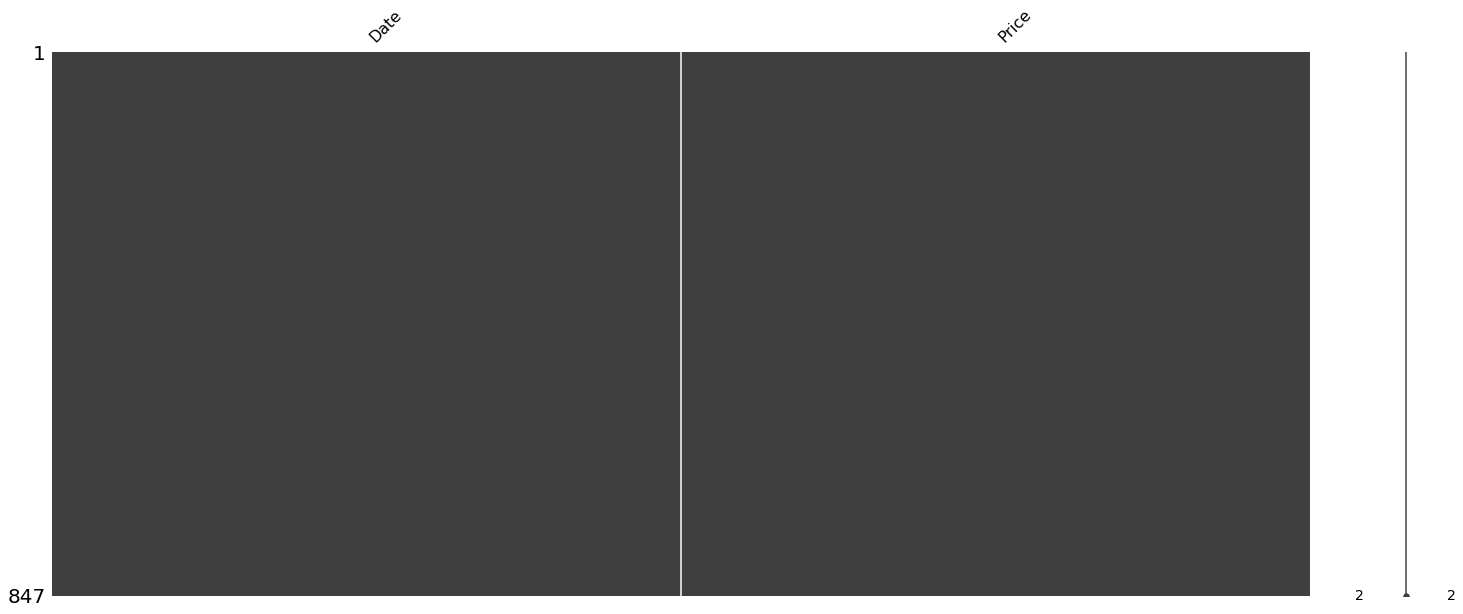

In [12]:
print("Checking missing values for price_gold DataFrame")
msno.matrix(price_gold)

Checking missing values for price_ng DataFrame


<AxesSubplot:>

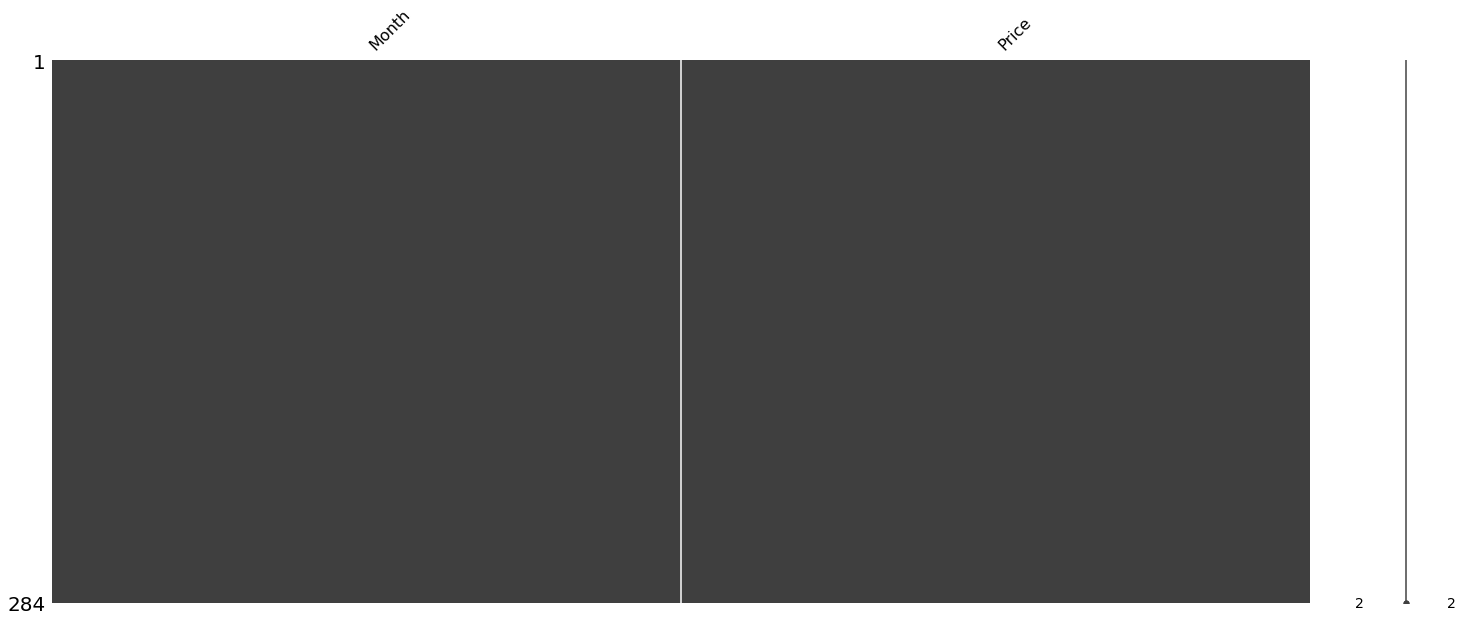

In [13]:
print("Checking missing values for price_ng DataFrame")
msno.matrix(price_ng)

Checking missing values for co2_level DataFrame


<AxesSubplot:>

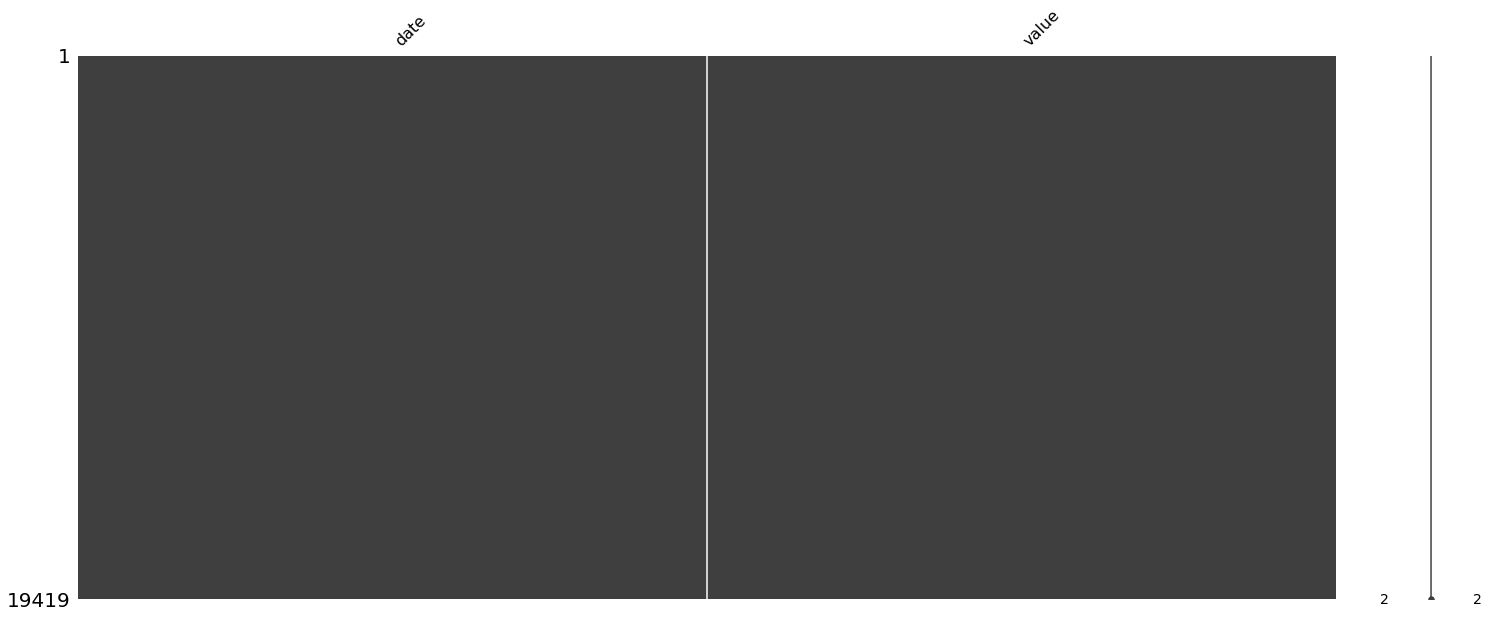

In [14]:
print("Checking missing values for co2_level DataFrame")
msno.matrix(co2_level)

Checking missing values for temp_anom DataFrame


<AxesSubplot:>

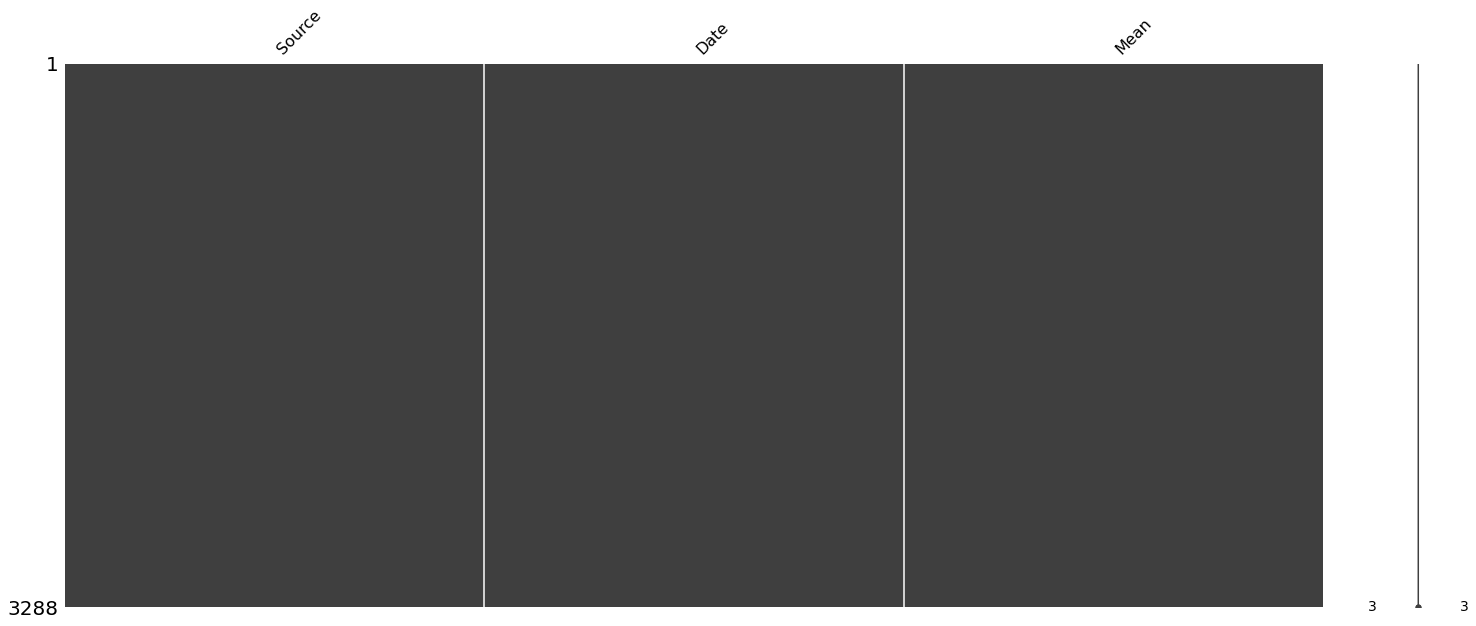

In [15]:
print("Checking missing values for temp_anom DataFrame")
msno.matrix(temp_anom)

From these Missing Matrix plots, there are no missing values detected.

It's a good sign for us to use these data to answer our curiosity questions before.

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C1_3"></a>
#### iii. Data Cleaning and Minor Manipulations
Some data cleaning and minor manipulations to obtain a single dataframe that contains all these extracted data

In [16]:
price_gold.info()
print()
price_ng.info()
print()
co2_level.info()
print()
temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   284 non-null    object 
 1   Price   284 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    19419 non-null  object 
 1   value   19419 non-null  float64
dtypes: float64(1), object(1)
memory usage: 303.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data

In [17]:
price_gold = price_gold.rename(columns={"Price":"Price_Gold"})
price_ng = price_ng.rename(columns={"Month":"Date","Price":"Price_NaturalGas"})
co2_level = co2_level.rename(columns={"date":"Date","value":"CO2_Level"})
temp_anom = temp_anom.rename(columns={"Mean":"Mean_TempAnom"})

price_gold.info()
print()
price_ng.info()
print()
co2_level.info()
print()
temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        847 non-null    object 
 1   Price_Gold  847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              284 non-null    object 
 1   Price_NaturalGas  284 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       19419 non-null  object 
 1   CO2_Level  19419 non-null  float64
dtypes: float64(1), object(1)
memory usage: 303.5+ KB

<class 'pa

In [18]:
price_gold["Date"] = pd.to_datetime(price_gold["Date"])
price_ng["Date"] = pd.to_datetime(price_ng["Date"])
co2_level["Date"] = pd.to_datetime(co2_level["Date"])
temp_anom["Date"] = pd.to_datetime(temp_anom["Date"])

price_gold.info()
print()
price_ng.info()
print()
co2_level.info()
print()
temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        847 non-null    datetime64[ns]
 1   Price_Gold  847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              284 non-null    datetime64[ns]
 1   Price_NaturalGas  284 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19419 non-null  datetime64[ns]
 1   CO2_Level

In [19]:
# combine all the extracted data into a data frame using Pandas pd.merge with inner joining
combined_df = pd.merge(price_gold, price_ng, how='inner', on="Date")
combined_df = pd.merge(combined_df, co2_level, how='inner', on="Date")
combined_df = pd.merge(combined_df, temp_anom, how="inner", on="Date")
combined_df

,Date,Price_Gold,Price_NaturalGas,CO2_Level,Source,Mean_TempAnom
0,1997-01-01,355.025,3.45,362.68,GCAG,0.3746
1,1997-01-01,355.025,3.45,362.68,GISTEMP,0.3300
2,1997-02-01,346.400,2.15,363.49,GCAG,0.4288
3,1997-02-01,346.400,2.15,363.49,GISTEMP,0.3700
4,1997-03-01,352.311,1.89,363.77,GCAG,0.4617
...,...,...,...,...,...,...
415,2016-08-01,1340.861,2.82,403.29,GISTEMP,0.9800
416,2016-10-01,1268.929,2.98,400.64,GCAG,0.7292
417,2016-10-01,1268.929,2.98,400.64,GISTEMP,0.8900
418,2016-11-01,1240.293,2.55,402.18,GCAG,0.7504


In [20]:
import numpy as np

length_df = len(combined_df)
combined_df["Time_Progress"] = pd.Series(np.zeros(length_df))

for i in range(length_df):
    combined_df.loc[i:,"Time_Progress"] = i+1
    i += 1

combined_df = combined_df[["Date","Time_Progress","Price_Gold","Price_NaturalGas","CO2_Level","Source","Mean_TempAnom"]]
combined_df

,Date,Time_Progress,Price_Gold,Price_NaturalGas,CO2_Level,Source,Mean_TempAnom
0,1997-01-01,1,355.025,3.45,362.68,GCAG,0.3746
1,1997-01-01,2,355.025,3.45,362.68,GISTEMP,0.3300
2,1997-02-01,3,346.400,2.15,363.49,GCAG,0.4288
3,1997-02-01,4,346.400,2.15,363.49,GISTEMP,0.3700
4,1997-03-01,5,352.311,1.89,363.77,GCAG,0.4617
...,...,...,...,...,...,...,...
415,2016-08-01,416,1340.861,2.82,403.29,GISTEMP,0.9800
416,2016-10-01,417,1268.929,2.98,400.64,GCAG,0.7292
417,2016-10-01,418,1268.929,2.98,400.64,GISTEMP,0.8900
418,2016-11-01,419,1240.293,2.55,402.18,GCAG,0.7504


In [21]:
# delete the "price_gold" and "price_ng" variables to save more storage and memory space
# since we are only interested to carry out regression analysis with the same length of data
del price_gold, price_ng, co2_level, temp_anom

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C1_4"></a>
#### iv. Overview of the extracted data

In [22]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              420 non-null    datetime64[ns]
 1   Time_Progress     420 non-null    int64         
 2   Price_Gold        420 non-null    float64       
 3   Price_NaturalGas  420 non-null    float64       
 4   CO2_Level         420 non-null    float64       
 5   Source            420 non-null    object        
 6   Mean_TempAnom     420 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 42.4+ KB


In [23]:
combined_df.describe()

,Time_Progress,Price_Gold,Price_NaturalGas,CO2_Level,Mean_TempAnom
count,420.000000,420.000000,420.000000,420.000000,420.000000
mean,210.500000,788.509429,4.426190,382.681286,0.628995
std,121.387808,490.839272,2.195842,11.904174,0.155787
min,1.000000,260.750000,1.720000,360.180000,0.240000
25%,105.750000,318.800000,2.790000,372.490000,0.532775
50%,210.500000,644.403500,3.935000,382.945000,0.624850
75%,315.250000,1241.452000,5.810000,393.000000,0.710000
max,420.000000,1780.648000,13.420000,407.490000,1.300000


In [24]:
from statsmodels.stats.descriptivestats import describe as desc
desc(combined_df)

,Time_Progress,Price_Gold,Price_NaturalGas,CO2_Level,Mean_TempAnom
nobs,420.000000,4.200000e+02,4.200000e+02,420.000000,4.200000e+02
missing,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
mean,210.500000,7.885094e+02,4.426190e+00,382.681286,6.289952e-01
std_err,0.289019,1.168665e+00,5.228195e-03,0.028343,3.709205e-04
upper_ci,211.066466,7.908000e+02,4.436438e+00,382.736838,6.297222e-01
lower_ci,209.933534,7.862189e+02,4.415943e+00,382.625734,6.282682e-01
std,121.387808,4.908393e+02,2.195842e+00,11.904174,1.557866e-01
iqr,209.500000,9.226520e+02,3.020000e+00,20.510000,1.772250e-01
iqr_normal,155.302582,6.839630e+02,2.238729e+00,15.204086,1.313771e-01
mad,105.000000,4.446656e+02,1.687107e+00,10.283750,1.165123e-01


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

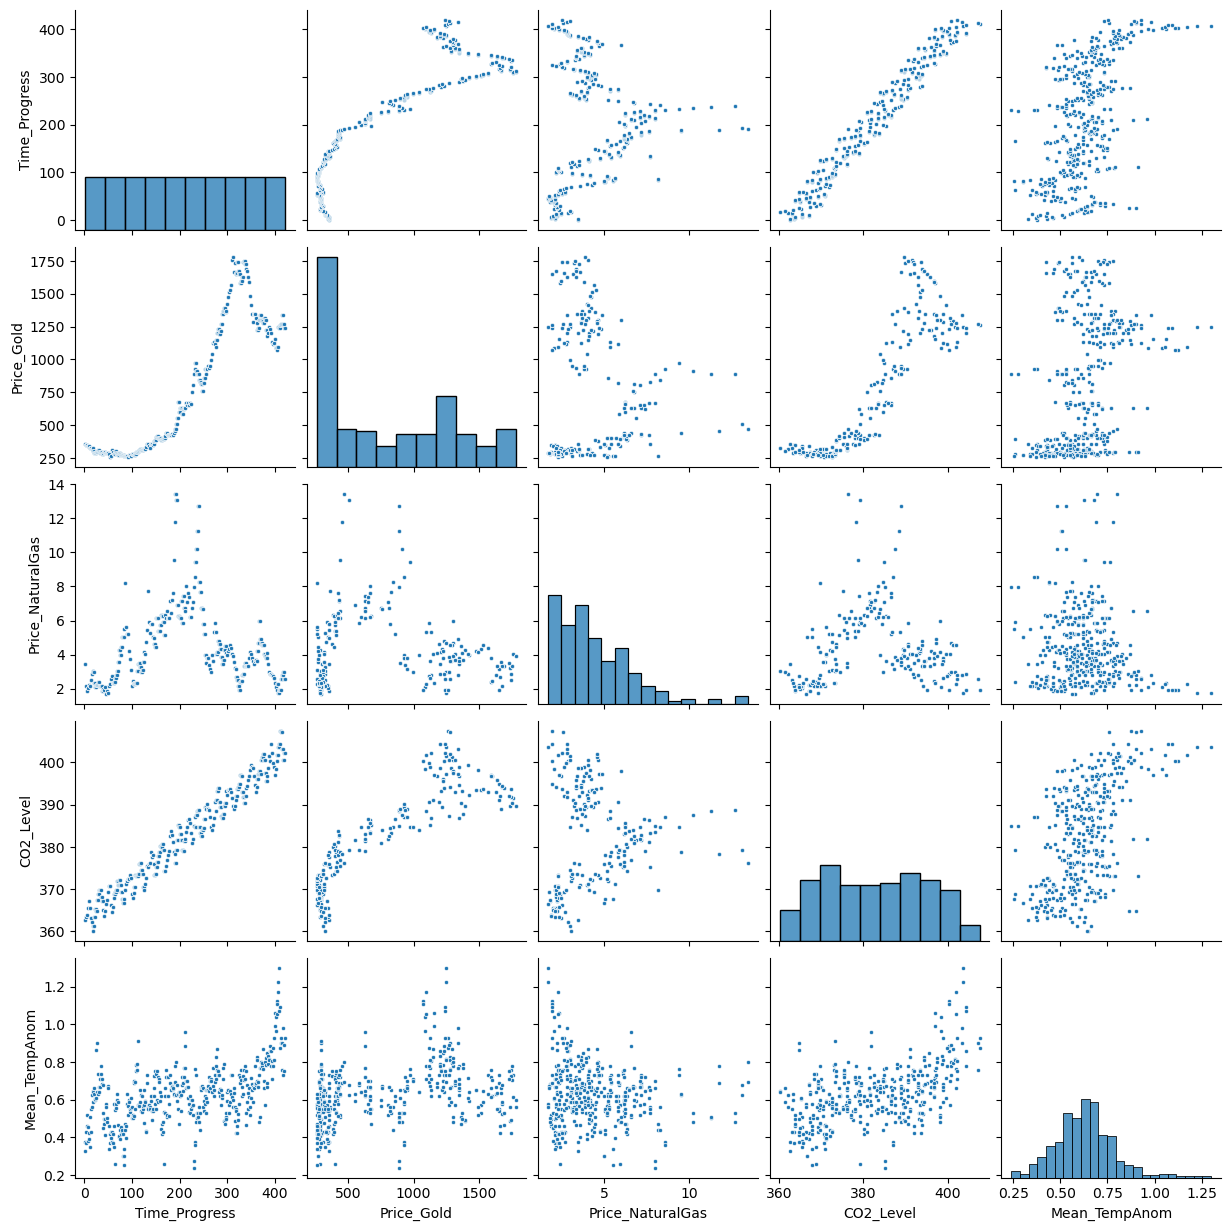

In [26]:
sns.pairplot(combined_df, vars=["Time_Progress","Price_Gold","Price_NaturalGas", "CO2_Level", "Mean_TempAnom"], diag_kind="hist", markers=".")
plt.show()

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C2"></a>
### 2. Correlation and Causation Analysis

<a id="C2_1"></a>
#### i. Correlation Analysis

Initially, we can answer our curiosity questions before by conducting correlation analysis on the data.

[Recap on the Questions](#I)

In [27]:
correlations = combined_df.corr()
correlations

,Time_Progress,Price_Gold,Price_NaturalGas,CO2_Level,Mean_TempAnom
Time_Progress,1.000000,0.887119,0.040439,0.980366,0.547584
Price_Gold,0.887119,1.000000,-0.110108,0.869657,0.358359
Price_NaturalGas,0.040439,-0.110108,1.000000,0.032665,-0.135874
CO2_Level,0.980366,0.869657,0.032665,1.000000,0.537508
Mean_TempAnom,0.547584,0.358359,-0.135874,0.537508,1.000000


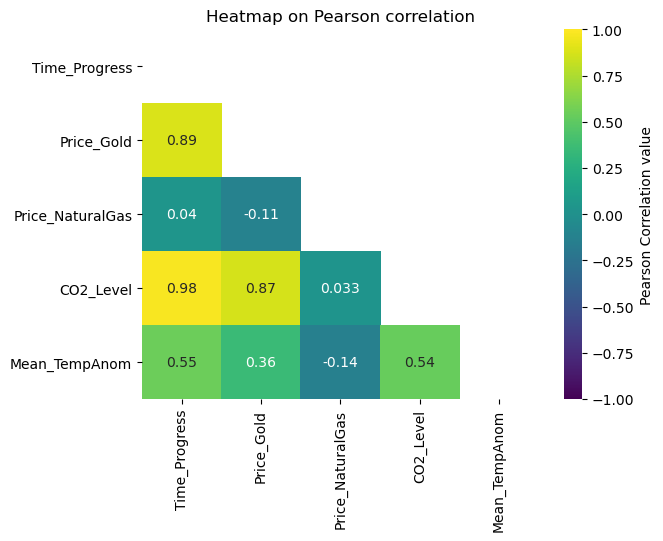

In [28]:
# Heatmap to visualize the correlation coefficients between variables
mask_corr = np.triu(np.ones_like(correlations, dtype=bool))

sns.heatmap(correlations, mask=mask_corr, cmap="viridis", vmin=1, vmax=-1, annot=True, cbar_kws={'label':"Pearson Correlation value"})
plt.title("Heatmap on Pearson correlation")
plt.show()

From the Correlation analysis above, we can say that:

<b>Q1: Do all the four data extracted are changing positively or negatively as time passes?</b>
<br><b>Answer:</b> Almost all data extracted are changing positively as time passes since hte Pearson correlation values are all positive, except for Natural Gas prices where its Pearson correlation value is nearly 0, which shows no correlation at all with the time progress.

<b>Q2: Is it true that the spike in gold prices affecting the natural gas prices?</b>
<br><b>Answer:</b> The Pearson correlation obtained is a negative value, which shows that the spike in Gold prices resulting in drops of Natural Gas prices.

<b>Q3: Is it true that temperature rises is affected by the increasing atmospheric CO<sub>2</sub> level?</b>
<br><b>Answer:</b> The Pearson correlation obtained is a positive value, which shows that the increase in the atmospheric CO<sub>2</sub> level resulting in increasing mean of temperature anomalies.

<b>Q4: Do the changes in natural gas prices involve in the increasing atmospheric CO<sub>2</sub> level?</b>
<br><b>Answer:</b> The Pearson correlation value obtained is nearly 0, which shows no correlation at all between changes in Natural Gas prices with the increasing atmospheric CO<sub>2</sub> level.

However, an important note from this analysis is: "<u>Correlation <b>DOES NOT IMPLY</b> Causation!</u>"

To prove whether this correlation analysis is valid, the Pearson correlation must be tested for causality.

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C2_2"></a>
#### ii. Causation Analysis

Following are the Hypothesis test using p-value to validate the Pearson correlation and confirming the causation/causality:

Null (H0) and Alternate (H1) Hypotheses:
- H0: The correlation coefficient is not significant, which is equals to 0
- H1: The correlation coefficient is significant



p-value test outcomes:
- If `p-value` $\le$ 0.05, reject H0.
- Else, where `p-value` $\gt$ 0.05, accept H0.

Codes provided by `@ostrowski` from Kaggle.com entry <b>Hypothesis test and p-values</b> and modified from: https://www.kaggle.com/ostrowski/hypothesis-test-and-p-values

In [88]:
# import Pearson correlation function from scipy.stats library
from scipy.stats import pearsonr

# function for the causation bootstrap test that uses p-value
def pearsonr_ptest(X_variable,Y_variable):
    
    # get the obtained Pearson correlation based on the choice of Y variable
    if X_variable == "Time_Progress":
        if Y_variable == "Price_Gold":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        elif Y_variable == "Price_NaturalGas":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        elif Y_variable == "CO2_Level":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        elif Y_variable == "Mean_TempAnom":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        else:
            return("WRONG INPUT!")
    elif X_variable == "Price_Gold":
        if Y_variable == "Price_NaturalGas":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        elif Y_variable == "CO2_Level":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        elif Y_variable == "Mean_TempAnom":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        else:
            return("WRONG INPUT!")
    elif X_variable == "Price_NaturalGas":
        if Y_variable == "CO2_Level":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        elif Y_variable == "Mean_TempAnom":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        else:
            return("WRONG INPUT!")
    elif X_variable == "CO2_Level":
        if Y_variable == "Mean_TempAnom":
            r, p_val = pearsonr(combined_df[X_variable],combined_df[Y_variable])
        else:
            return("WRONG INPUT!")
    else:
        return("WRONG INPUT!")
    
    # display the p-value
    print("----SUMMARY OF P-VALUE TEST FOR CAUSATION----")
    print(f"X variable: {X_variable}\nY variable: {Y_variable}\n")
    print(f"Pearson correlation, r = {r:0.3f}\n")
    print(f"P-value = {p_val:0.3f}")
    print("P-value <= 0.05: ", p_val<=0.05)
    if p_val<=0.05:
        print("\nH0 is rejected. The correlation coefficient is significant")
        print("Thus, the X variable cause changes to Y variable")
    else:
        print("\nH0 can't be rejected")
        print("There might be no correlation at all between X and Y variables")
    print("---------------------------------------------\n")

Run the defined function of codes above to prove the causality, hence initially answering our questions before:

<b>1. Do all the four data extracted are changes positively or negatively as time passes?</b>
<a id="C2_2_1"></a>

In [89]:
# X variable: "Time_Progress", Y variable: "Price_Gold"
pearsonr_ptest("Time_Progress","Price_Gold")

----SUMMARY OF P-VALUE TEST FOR CAUSATION----
X variable: Time_Progress
Y variable: Price_Gold

Pearson correlation, r = 0.887

P-value = 0.000
P-value <= 0.05:  True

H0 is rejected. The correlation coefficient is significant
Thus, the X variable cause changes to Y variable
---------------------------------------------



In [90]:
# X variable: "Time_Progress", Y variable: "Price_NaturalGas"
pearsonr_ptest("Time_Progress","Price_NaturalGas")

----SUMMARY OF P-VALUE TEST FOR CAUSATION----
X variable: Time_Progress
Y variable: Price_NaturalGas

Pearson correlation, r = 0.040

P-value = 0.408
P-value <= 0.05:  False

H0 can't be rejected
There might be no correlation at all between X and Y variables
---------------------------------------------



In [91]:
# X variable: "Time_Progress", Y variable: "CO2_Level"
pearsonr_ptest("Time_Progress","CO2_Level")

----SUMMARY OF P-VALUE TEST FOR CAUSATION----
X variable: Time_Progress
Y variable: CO2_Level

Pearson correlation, r = 0.980

P-value = 0.000
P-value <= 0.05:  True

H0 is rejected. The correlation coefficient is significant
Thus, the X variable cause changes to Y variable
---------------------------------------------



In [92]:
# X variable: "Time_Progress", Y variable: "Mean_TempAnom"
pearsonr_ptest("Time_Progress","Mean_TempAnom")

----SUMMARY OF P-VALUE TEST FOR CAUSATION----
X variable: Time_Progress
Y variable: Mean_TempAnom

Pearson correlation, r = 0.548

P-value = 0.000
P-value <= 0.05:  True

H0 is rejected. The correlation coefficient is significant
Thus, the X variable cause changes to Y variable
---------------------------------------------



From these causation analysis, it is further proven that:
- No such thing in Natural Gas prices changes affected by the time progress, and
- For the rest three data (Gold prices, atmospheric CO<sub>2</sub> level and mean temperature anomalies), their changes are driven by the time progress.

<b>2. Is it true that the spike in gold prices affecting the natural gas prices?</b>
<a id="C2_2_2"></a>

In [34]:
# X variable: "Price_Gold", Y variable: "Price_NaturalGas"
pearsonr_ptest("Price_Gold","Price_NaturalGas")

----SUMMARY OF P-VALUE TEST FOR CAUSATION----
X variable: Price_Gold
Y variable: Price_NaturalGas

Pearson correlation, r = -0.110

P-value = 0.024
P-value <= 0.05:  True

H0 is rejected. The correlation coefficient is significant
Thus, the X variable cause changes to Y variable
---------------------------------------------



Even though the Pearson correlation value is low, but the p-value proves that this low value is still acceptable.
<br>Hence, we have to agree that the spike in Gold prices resulting in Natural Gas prices drop

<b>3. Is it true that temperature rises is affected by the increasing atmospheric CO<sub>2</sub> level?</b>
<a id="C2_2_3"></a>

In [39]:
# X variable: "CO2_Level", Y variable: "Mean_TempAnom"
pearsonr_ptest("CO2_Level","Mean_TempAnom")

----SUMMARY OF P-VALUE TEST FOR CAUSATION----
X variable: CO2_Level
Y variable: Mean_TempAnom

Pearson correlation, r = 0.538

P-value = 0.000
P-value <= 0.05:  True

H0 is rejected. The correlation coefficient is significant
Thus, the X variable cause changes to Y variable
---------------------------------------------



Based on this correlation analysis, it is further proven that the rise in atmospheric CO<sub>2</sub> level is causing the rise in the mean temperature anomalies

<b>4. Do the changes in natural gas prices involve in the increasing atmospheric CO<sub>2</sub> level?</b>
<a id="C2_2_4"></a>

In [37]:
# X variable: "Price_NaturalGas", Y variable: "CO2_Level"
pearsonr_ptest("Price_NaturalGas","CO2_Level")

----SUMMARY OF P-VALUE TEST FOR CAUSATION----
X variable: Price_NaturalGas
Y variable: CO2_Level

Pearson correlation, r = 0.033

P-value = 0.504
P-value <= 0.05:  False

H0 can't be rejected
There might be no correlation at all between X and Y variables
---------------------------------------------



In addition to the Pearson correlation value near to 0, the correlation analysis algo agrees that there is no such thing as CO<sub>2</sub> atmoshperic level affected by the Natural Gas prices

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C3"></a>
### 3. Summary on Regression Analysis using OLS
To show the extent of relations between these data, regression analysis can be done where all the parameters given are explaining their relations.

Before carrying out the regression analysis, some minor modifications on the data are required to help in obtaining the analysis as accurate as possible.
1. Create a dummy variable for the categorical variables - so that categorical variables can be included in the analysis
2. Adding a constant value of 1 into the data - to obtain constant coefficient in the analysis

Codes provided by `@sametgirgin` in the Medium blog entry <b>Multiple Linear Regression Model in 7 Steps with Python</b> and modified from: https://medium.com/@sametgirgin/multiple-linear-regression-model-in-7-steps-with-python-f02dbb13c51e

In [42]:
from statsmodels import api as sm

# creating dummy variables to include categorical variables in the multiple regression analysis
dummy_categ = pd.get_dummies(combined_df["Source"])
combined_df = combined_df.join(dummy_categ)

# add a column "constant" to include the constant coefficient in the multiple regression analysis
combined_df = sm.add_constant(combined_df)
combined_df

,const,Date,Time_Progress,Price_Gold,Price_NaturalGas,CO2_Level,Source,Mean_TempAnom,GCAG,GISTEMP
0,1.0,1997-01-01,1,355.025,3.45,362.68,GCAG,0.3746,1,0
1,1.0,1997-01-01,2,355.025,3.45,362.68,GISTEMP,0.3300,0,1
2,1.0,1997-02-01,3,346.400,2.15,363.49,GCAG,0.4288,1,0
3,1.0,1997-02-01,4,346.400,2.15,363.49,GISTEMP,0.3700,0,1
4,1.0,1997-03-01,5,352.311,1.89,363.77,GCAG,0.4617,1,0
...,...,...,...,...,...,...,...,...,...,...
415,1.0,2016-08-01,416,1340.861,2.82,403.29,GISTEMP,0.9800,0,1
416,1.0,2016-10-01,417,1268.929,2.98,400.64,GCAG,0.7292,1,0
417,1.0,2016-10-01,418,1268.929,2.98,400.64,GISTEMP,0.8900,0,1
418,1.0,2016-11-01,419,1240.293,2.55,402.18,GCAG,0.7504,1,0


[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C3_1"></a>
#### i. `Time_Progress` as the only independent variable X

Python can provide regression analysis summary using the API function `OLS` from the `statsmodels` library. This regression analysis is carried out using the <u>Ordinary Least Squares</u> method, hence named as `OLS`.

In [43]:
# define a function to carry out the regression analysis for only 1 independent variable X
def summary_regr_1x(X_var,Y_var):
    global regressor_OLS
    regressor_OLS = sm.OLS(endog=combined_df[Y_var],\
                       exog=combined_df[X_var]).fit()
    
X_variable = ["const","Time_Progress"]

The following equation describes the model from the regression analysis summary:

$y = \beta_0 + \beta_1($ `Time_Progress` $)$

where:
- $\beta$<sub>0</sub> refers to the <b>"coef"</b> for the `const`, which is the <u>constant coefficient</u>, and
- $\beta$<sub>1</sub> refers to the <b>"coef"</b> for the `Time_Progress` variable

However, an <u>important note</u> from the summary is on the displayed <b>R-squared</b> value which determines the reliability of the regression model:
- for 0.7 $\le$ <b>R-squared</b> $\le$ 1.0 : The model is accepted
- for 0.3 $\le$ <b>R-squared</b> $\lt$ 0.7 : The model is partially accepted, where the model partially fits the data
- else, where 0.0 $\le$ <b>R-squared</b> $\lt$ 0.3 : The model is REJECTED - not reliable and inaccurate

In [44]:
summary_regr_1x(X_variable,"Price_Gold")
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_Gold   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1544.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.92e-142
Time:                        14:47:08   Log-Likelihood:                -2873.1
No. Observations:                 420   AIC:                             5750.
Df Residuals:                     418   BIC:                             5758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            33.4204     22.174      1.507      0.133     -10.167      77.007
Time_Progress     3.5871      0.091     39.297      0.000       3.408       3.767
==============================================================================
Omnibus:                       35.690   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.398
Skew:                           0.785   Prob(JB):                     3.77e-10
Kurtosis:                       2.876   Cond. No.                         487.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since R-squared value  $\gt$ 0.7, then we can say that the equation from this regression analysis summary is:

`Price_Gold` $= 33.42 + 3.59($ `Time_Progress` $)$

In [45]:
summary_regr_1x(X_variable,"CO2_Level")
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CO2_Level   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          7.25e-297
Time:                        14:47:08   Log-Likelihood:                -953.84
No. Observations:                 420   AIC:                             1912.
Df Residuals:                     418   BIC:                             1920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           362.4434      0.230   1577.462      0.000     361.992     362.895
Time_Progress     0.0961      0.001    101.647      0.000       0.094       0.098
==============================================================================
Omnibus:                       52.306   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.585
Skew:                          -0.062   Prob(JB):                     0.000681
Kurtosis:                       2.095   Cond. No.                         487.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since R-squared value $\approx$ 1.0, then we can say that the equation from this regression analysis summary is:

`CO2_Level` $= 362.443 + 0.096($ `Time_Progress` $)$

In [46]:
summary_regr_1x(X_variable,"Mean_TempAnom")
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Mean_TempAnom   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     179.0
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           3.13e-34
Time:                        14:47:08   Log-Likelihood:                 260.30
No. Observations:                 420   AIC:                            -516.6
Df Residuals:                     418   BIC:                            -508.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4811      0.013     37.703      0.000       0.456       0.506
Time_Progress     0.0007   5.25e-05     13.380      0.000       0.001       0.001
==============================================================================
Omnibus:                       25.098   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.384
Skew:                           0.427   Prob(JB):                     2.81e-09
Kurtosis:                       4.234   Cond. No.                         487.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, R-squared value $\ge$ 0.3. The following equation derived from this regression analysis summary is partially acceptable:

`Mean_TempAnom` $= 0.4811 + 0.0007($ `Time_Progress` $)$

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

Similarly, the same regression analysis can be used for any dependent variable, and the regression equation is defined as follows:

Y_variable $= \beta_0 + \beta_1($X_variable$)$

where:
- $\beta$<sub>0</sub> refers to the <b>"coef"</b> for the `const`, which is the <u>constant coefficient</u>
- $\beta$<sub>1</sub> refers to the <b>"coef"</b> for the X_variable

<a id="C3_2"></a>
#### ii. `Price_NaturalGas` vs `Price_Gold`

Below is the regression analysis summary for `Price_Gold` as the independent variable X versus `Price_NaturalGas` as the dependent variable Y:

In [47]:
summary_regr_1x(["const","Price_Gold"],"Price_NaturalGas")
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Price_NaturalGas   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.130
Date:                Fri, 19 Feb 2021   Prob (F-statistic):             0.0240
Time:                        14:47:08   Log-Likelihood:                -923.25
No. Observations:                 420   AIC:                             1850.
Df Residuals:                     418   BIC:                             1859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8146      0.202     23.843      0.000       4.418       5.212
Price_Gold    -0.0005      0.000     -2.265      0.024      -0.001   -6.51e-05
==============================================================================
Omnibus:                      113.299   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.860
Skew:                           1.370   Prob(JB):                     2.26e-57
Kurtosis:                       5.720   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, the R-squared value $\approx$ 0. Definitely, the equation derived from this regresison analysis summary is REJECTED.

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C3_3"></a>
#### iii. `Mean_TempAnom` vs `CO2_Level`

In [48]:
summary_regr_1x(["const","CO2_Level"],"Mean_TempAnom")
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Mean_TempAnom   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     169.8
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           8.12e-33
Time:                        14:47:08   Log-Likelihood:                 257.04
No. Observations:                 420   AIC:                            -510.1
Df Residuals:                     418   BIC:                            -502.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0629      0.207     -9.982      0.000      -2.469      -1.657
CO2_Level      0.0070      0.001     13.032      0.000       0.006       0.008
==============================================================================
Omnibus:                       22.515   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.801
Skew:                           0.403   Prob(JB):                     4.57e-08
Kurtosis:                       4.132   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, the R-squared value $\lt$ 0.3. So, the equation derived from this regresison analysis summary is REJECTED.

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C3_4"></a>
#### iv. `CO2_Level` vs `Price_NaturalGas`

In [49]:
summary_regr_1x(["const","Price_NaturalGas"],"CO2_Level")
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CO2_Level   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4465
Date:                Fri, 19 Feb 2021   Prob (F-statistic):              0.504
Time:                        14:47:08   Log-Likelihood:                -1635.5
No. Observations:                 420   AIC:                             3275.
Df Residuals:                     418   BIC:                             3283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              381.8975      1.309    291.717      0.000     379.324     384.471
Price_NaturalGas     0.1771      0.265      0.668      0.504      -0.344       0.698
==============================================================================
Omnibus:                      150.893   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.661
Skew:                           0.113   Prob(JB):                     1.20e-05
Kurtosis:                       1.885   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value $\approx$ 0. This too, definitely the equation derived from this regresison analysis summary is REJECTED.

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C3_5"></a>
#### v. (Extra) Multiple Regression Analysis

In Multiple Regression Analysis, the summary is interpreted into the following equation of the regression model:

$y = \beta_0  + \beta_1(x_1) + \beta_2(x_2) + ... + \beta_n(x_n)$ [for $n =$ Total number of independent variables, Xs]
<br>where:

- $y :$ the dependent variable Y
- $\beta_0 :$ the <b>coef</b> value for <u>const</u>, which is the constant coefficient
- $\beta_1 :$ the <b>coef</b> value for the 1st independent variable, $x_1$
- $\beta_2 :$ the <b>coef</b> value for the 2nd independent variable, $x_2$
<br>and so on...until the nth independent variable, $x_n$

##### `Price_Gold` as the dependent variable Y

In [50]:
regressor_OLS = sm.OLS(endog=combined_df["Price_Gold"],\
                       exog=combined_df[["const","Time_Progress","Price_NaturalGas","CO2_Level","Mean_TempAnom"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_Gold   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     552.6
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.03e-164
Time:                        14:47:08   Log-Likelihood:                -2810.4
No. Observations:                 420   AIC:                             5631.
Df Residuals:                     415   BIC:                             5651.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              991.2700   1481.633      0.669      0.504   -1921.171    3903.711
Time_Progress        4.2289      0.404     10.461      0.000       3.434       5.024
Price_NaturalGas   -40.6202      4.449     -9.130      0.000     -49.366     -31.874
CO2_Level           -1.2315      4.084     -0.302      0.763      -9.259       6.796
Mean_TempAnom     -702.4949     74.839     -9.387      0.000    -849.607    -555.383
==============================================================================
Omnibus:                       20.331   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.265
Skew:                           0.552   Prob(JB):                     1.46e-05
Kurtosis:                       2.772   Cond. No.                     6.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
regressor_OLS = sm.OLS(endog=combined_df["Price_Gold"],\
                       exog=combined_df[["const","Time_Progress","Price_NaturalGas","CO2_Level","GCAG","GISTEMP","Mean_TempAnom"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_Gold   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     441.0
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          2.58e-163
Time:                        14:47:08   Log-Likelihood:                -2810.4
No. Observations:                 420   AIC:                             5633.
Df Residuals:                     414   BIC:                             5657.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              661.2673    989.143      0.669      0.504   -1283.102    2605.637
Time_Progress        4.2291      0.405     10.447      0.000       3.433       5.025
Price_NaturalGas   -40.6200      4.455     -9.119      0.000     -49.376     -31.864
CO2_Level           -1.2333      4.089     -0.302      0.763      -9.272       6.805
GCAG               330.8382    494.855      0.669      0.504    -641.904    1303.581
GISTEMP            330.4292    494.474      0.668      0.504    -641.563    1302.421
Mean_TempAnom     -702.4654     74.943     -9.373      0.000    -849.781    -555.150
==============================================================================
Omnibus:                       20.333   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.269
Skew:                           0.552   Prob(JB):                     1.46e-05
Kurtosis:                       2.773   Cond. No.                     1.31e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
regressor_OLS = sm.OLS(endog=combined_df["Price_Gold"],\
                       exog=combined_df[["const","Time_Progress","Price_NaturalGas","Mean_TempAnom"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_Gold   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     738.3
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          3.65e-166
Time:                        14:47:08   Log-Likelihood:                -2810.5
No. Observations:                 420   AIC:                             5629.
Df Residuals:                     416   BIC:                             5645.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              544.6728     47.729     11.412      0.000     450.852     638.493
Time_Progress        4.1104      0.095     43.209      0.000       3.923       4.297
Price_NaturalGas   -40.5729      4.442     -9.135      0.000     -49.304     -31.842
Mean_TempAnom     -702.4351     74.757     -9.396      0.000    -849.384    -555.486
==============================================================================
Omnibus:                       20.638   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.731
Skew:                           0.561   Prob(JB):                     1.16e-05
Kurtosis:                       2.795   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

##### `Price_NaturalGas` as the dependent variable Y

In [53]:
regressor_OLS = sm.OLS(endog=combined_df["Price_NaturalGas"],\
                       exog=combined_df[["const","Time_Progress","Price_Gold","CO2_Level","Mean_TempAnom"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Price_NaturalGas   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     25.83
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           3.94e-19
Time:                        14:47:08   Log-Likelihood:                -879.13
No. Observations:                 420   AIC:                             1768.
Df Residuals:                     415   BIC:                             1788.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.6890     14.897      1.255      0.210     -10.594      47.972
Time_Progress     0.0225      0.004      5.062      0.000       0.014       0.031
Price_Gold       -0.0041      0.000     -9.130      0.000      -0.005      -0.003
CO2_Level        -0.0320      0.041     -0.780      0.436      -0.113       0.049
Mean_TempAnom    -5.5397      0.784     -7.068      0.000      -7.080      -3.999
==============================================================================
Omnibus:                      131.349   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.429
Skew:                           1.470   Prob(JB):                     2.02e-84
Kurtosis:                       6.659   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
regressor_OLS = sm.OLS(endog=combined_df["Price_NaturalGas"],\
                       exog=combined_df[["const","Time_Progress","Price_Gold","CO2_Level","GCAG","GISTEMP","Mean_TempAnom"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Price_NaturalGas   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     20.61
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.15e-18
Time:                        14:47:08   Log-Likelihood:                -879.13
No. Observations:                 420   AIC:                             1770.
Df Residuals:                     414   BIC:                             1795.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4514      9.945      1.252      0.211      -7.098      32.001
Time_Progress     0.0225      0.004      5.054      0.000       0.014       0.031
Price_Gold       -0.0041      0.000     -9.119      0.000      -0.005      -0.003
CO2_Level        -0.0320      0.041     -0.778      0.437      -0.113       0.049
GCAG              6.2219      4.976      1.250      0.212      -3.559      16.002
GISTEMP           6.2295      4.972      1.253      0.211      -3.543      16.002
Mean_TempAnom    -5.5402      0.785     -7.059      0.000      -7.083      -3.997
==============================================================================
Omnibus:                      131.338   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.366
Skew:                           1.470   Prob(JB):                     2.08e-84
Kurtosis:                       6.658   Cond. No.                     3.08e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.58e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
regressor_OLS = sm.OLS(endog=combined_df["Price_NaturalGas"],\
                       exog=combined_df[["const","Time_Progress","Price_Gold","Mean_TempAnom"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Price_NaturalGas   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     34.27
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           8.26e-20
Time:                        14:47:09   Log-Likelihood:                -879.44
No. Observations:                 420   AIC:                             1767.
Df Residuals:                     416   BIC:                             1783.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0760      0.428     16.531      0.000       6.235       7.917
Time_Progress     0.0194      0.002      9.538      0.000       0.015       0.023
Price_Gold       -0.0041      0.000     -9.135      0.000      -0.005      -0.003
Mean_TempAnom    -5.5422      0.783     -7.074      0.000      -7.082      -4.002
==============================================================================
Omnibus:                      133.036   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.285
Skew:                           1.482   Prob(JB):                     5.38e-87
Kurtosis:                       6.731   Cond. No.                     8.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

##### `CO2_Level` as the dependent variable Y

In [56]:
regressor_OLS = sm.OLS(endog=combined_df["CO2_Level"],\
                       exog=combined_df[["const","Time_Progress","Price_Gold","Price_NaturalGas","Mean_TempAnom"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CO2_Level   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2568.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          3.50e-291
Time:                        14:47:09   Log-Likelihood:                -953.53
No. Observations:                 420   AIC:                             1917.
Df Residuals:                     415   BIC:                             1937.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              362.7280      0.658    551.191      0.000     361.434     364.022
Time_Progress        0.0969      0.003     36.150      0.000       0.092       0.102
Price_Gold          -0.0002      0.001     -0.302      0.763      -0.001       0.001
Price_NaturalGas    -0.0457      0.059     -0.780      0.436      -0.161       0.069
Mean_TempAnom       -0.1735      0.990     -0.175      0.861      -2.120       1.773
==============================================================================
Omnibus:                       54.805   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.895
Skew:                          -0.060   Prob(JB):                     0.000583
Kurtosis:                       2.085   Cond. No.                     9.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
regressor_OLS = sm.OLS(endog=combined_df["CO2_Level"],\
                       exog=combined_df[["const","Time_Progress","Price_Gold","Price_NaturalGas","GCAG","GISTEMP","Mean_TempAnom"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CO2_Level   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2051.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.73e-289
Time:                        14:47:09   Log-Likelihood:                -953.44
No. Observations:                 420   AIC:                             1919.
Df Residuals:                     414   BIC:                             1943.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              241.8160      0.439    550.581      0.000     240.953     242.679
Time_Progress        0.0969      0.003     36.113      0.000       0.092       0.102
Price_Gold          -0.0002      0.001     -0.302      0.763      -0.001       0.001
Price_NaturalGas    -0.0456      0.059     -0.778      0.437      -0.161       0.070
GCAG               120.9560      0.247    490.688      0.000     120.471     121.441
GISTEMP            120.8600      0.249    484.605      0.000     120.370     121.350
Mean_TempAnom       -0.1667      0.991     -0.168      0.867      -2.116       1.782
==============================================================================
Omnibus:                       55.030   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.925
Skew:                          -0.061   Prob(JB):                     0.000574
Kurtosis:                       2.084   Cond. No.                     2.88e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
regressor_OLS = sm.OLS(endog=combined_df["CO2_Level"],\
                       exog=combined_df[["const","Time_Progress","GCAG","GISTEMP"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CO2_Level   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     5156.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          8.47e-295
Time:                        14:47:09   Log-Likelihood:                -953.75
No. Observations:                 420   AIC:                             1913.
Df Residuals:                     417   BIC:                             1926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           241.6287      0.153   1575.893      0.000     241.327     241.930
Time_Progress     0.0961      0.001    101.547      0.000       0.094       0.098
GCAG            120.8624      0.138    877.025      0.000     120.592     121.133
GISTEMP         120.7663      0.138    873.440      0.000     120.495     121.038
==============================================================================
Omnibus:                       52.503   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.611
Skew:                          -0.062   Prob(JB):                     0.000672
Kurtosis:                       2.095   Cond. No.                     1.10e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

##### `Mean_TempAnom` as the dependent variable Y

In [59]:
regressor_OLS = sm.OLS(endog=combined_df["Mean_TempAnom"],\
                       exog=combined_df[["const","Time_Progress","Price_Gold","Price_NaturalGas","CO2_Level"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Mean_TempAnom   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     82.55
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.65e-51
Time:                        14:47:09   Log-Likelihood:                 308.37
No. Observations:                 420   AIC:                            -606.7
Df Residuals:                     415   BIC:                            -586.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7267      0.882      0.824      0.411      -1.008       2.461
Time_Progress        0.0017      0.000      6.397      0.000       0.001       0.002
Price_Gold          -0.0002   2.66e-05     -9.387      0.000      -0.000      -0.000
Price_NaturalGas    -0.0194      0.003     -7.068      0.000      -0.025      -0.014
CO2_Level           -0.0004      0.002     -0.175      0.861      -0.005       0.004
==============================================================================
Omnibus:                       13.586   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.359
Skew:                           0.330   Prob(JB):                     0.000280
Kurtosis:                       3.706   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
regressor_OLS = sm.OLS(endog=combined_df["Mean_TempAnom"],\
                       exog=combined_df[["const","Time_Progress","Price_Gold","Price_NaturalGas","GCAG","GISTEMP","CO2_Level"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Mean_TempAnom   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     65.92
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.51e-50
Time:                        14:47:09   Log-Likelihood:                 308.42
No. Observations:                 420   AIC:                            -604.8
Df Residuals:                     414   BIC:                            -580.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4805      0.589      0.816      0.415      -0.677       1.638
Time_Progress        0.0017      0.000      6.381      0.000       0.001       0.002
Price_Gold          -0.0002   2.66e-05     -9.373      0.000      -0.000      -0.000
Price_NaturalGas    -0.0194      0.003     -7.059      0.000      -0.025      -0.014
GCAG                 0.2383      0.295      0.809      0.419      -0.341       0.818
GISTEMP              0.2421      0.294      0.822      0.411      -0.337       0.821
CO2_Level           -0.0004      0.002     -0.168      0.867      -0.005       0.004
==============================================================================
Omnibus:                       13.247   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.935
Skew:                           0.324   Prob(JB):                     0.000347
Kurtosis:                       3.701   Cond. No.                     2.94e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
regressor_OLS = sm.OLS(endog=combined_df["Mean_TempAnom"],\
                       exog=combined_df[["const","Time_Progress","Price_Gold","Price_NaturalGas"]]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Mean_TempAnom   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     110.3
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.46e-52
Time:                        14:47:09   Log-Likelihood:                 308.35
No. Observations:                 420   AIC:                            -608.7
Df Residuals:                     416   BIC:                            -592.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5722      0.017     34.542      0.000       0.540       0.605
Time_Progress        0.0016      0.000     15.099      0.000       0.001       0.002
Price_Gold          -0.0002   2.65e-05     -9.396      0.000      -0.000      -0.000
Price_NaturalGas    -0.0194      0.003     -7.074      0.000      -0.025      -0.014
==============================================================================
Omnibus:                       13.566   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.308
Skew:                           0.330   Prob(JB):                     0.000288
Kurtosis:                       3.704   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C4"></a>
### 4. Linear Regression Model

In [62]:
# import scikit-learn and math libraries for developing the regression models
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from scipy.stats import ttest_ind as T_test
from scipy.stats import f_oneway as F_test
import math

from sklearn import linear_model as LM

<a id="C4_1"></a>
#### i. Separating the data
In machine learning, it is a compulsory practice to separate the data into train and test sets where the model is built using the train sets, and validated using the test sets.

One of the most famous rule to carry out this data separation process is the <b>80/20 rule</b>, which is similar to the <b>"Pareto" principle</b>.

In Quality Control, <b>"Pareto" principle</b> is the method of detecting problems that need to be highlighted by separating the observed data into partitions where <u>80% of them are the major problem</u> that eventually resulted in the occurence of the <u>rest 20% as minor problems</u>.

In [63]:
# using 80/20 rule to separate the data into train/test sets
train = round(len(combined_df)*0.8)
test = round(len(combined_df)*0.2)

print(train)
print(test)
print(train + test == len(combined_df))

336
84
True


In [64]:
# separate the data to prepare for the model
def separate_data(X_var,Y_var):
    # create global variables for the model
    global model_X, model_X_train, model_X_test, model_Y, model_Y_train, model_Y_test
    
    # defining the independent data X and dependent data Y
    model_X, model_Y = combined_df[X_var], combined_df[Y_var]

    # separating the independent data X
    model_X_train, model_X_test = model_X[:-test], model_X[-test:]
    
    # separating the dependent data Y
    model_Y_train, model_Y_test = model_Y[:-test], model_Y[-test:]

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C4_2"></a>
#### ii. Seaborn plots for illustration overview on the model

The following plots are helping us to get an overview on how the model should be constructed when plotted using graphing method such as Matplotlib or Seaborn in Python environment.

Codes provided by `@subinium` in Kaggle.com entry <b>Basic of Statistical Viz : Plotly & Seaborn</b> and modified from https://www.kaggle.com/subinium/basic-of-statistical-viz-plotly-seaborn

In [72]:
# define function for Seaborn joint plot
def joint_plot(X_var,Y_var):
    g = sns.jointplot(data=combined_df, x=X_var, y=Y_var, kind='hex')
    g.fig.suptitle(f"Joint plot on distribution pattern between {Y_var} and {X_var}")
    g.fig.subplots_adjust(top=0.95)
    plt.show()
    
# define function for Seaborn linear regression plot
def reg_plot(X_var,Y_var):
    sns.regplot(data=combined_df, x=X_var, y=Y_var, scatter_kws={'s':1}, ci=None)
    plt.title(f"Scatter plot with regression line to show linear relationship \n between {Y_var} and {X_var}")
    plt.show()

# define a simple function to call all those plots functions
def show_modelplots(X_variable,Y_variable):
    joint_plot(X_variable,Y_variable)
    print()
    reg_plot(X_variable,Y_variable)

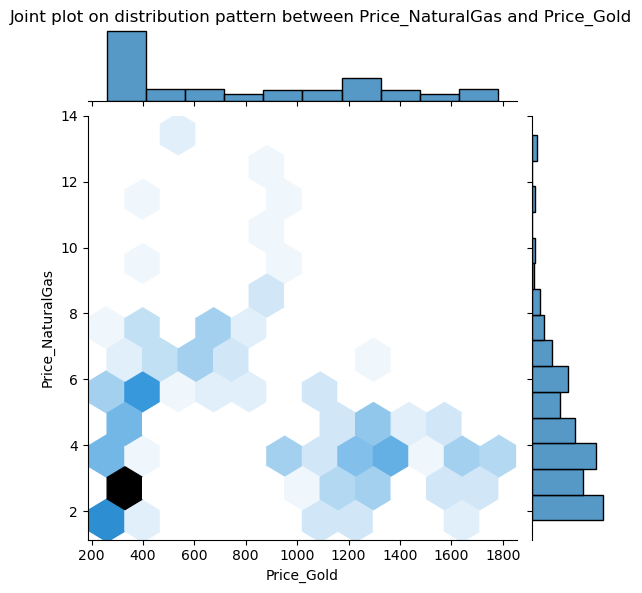

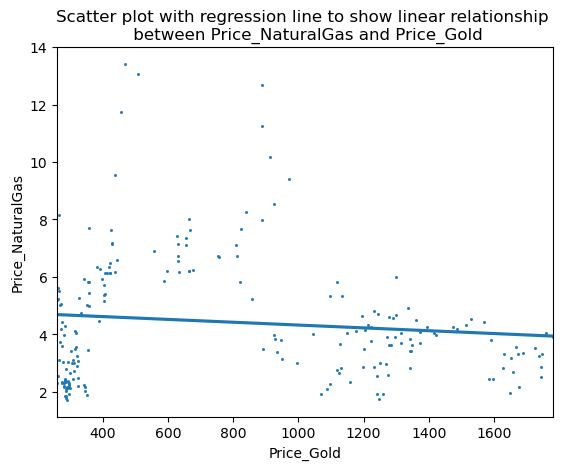

In [73]:
show_modelplots("Price_Gold","Price_NaturalGas")

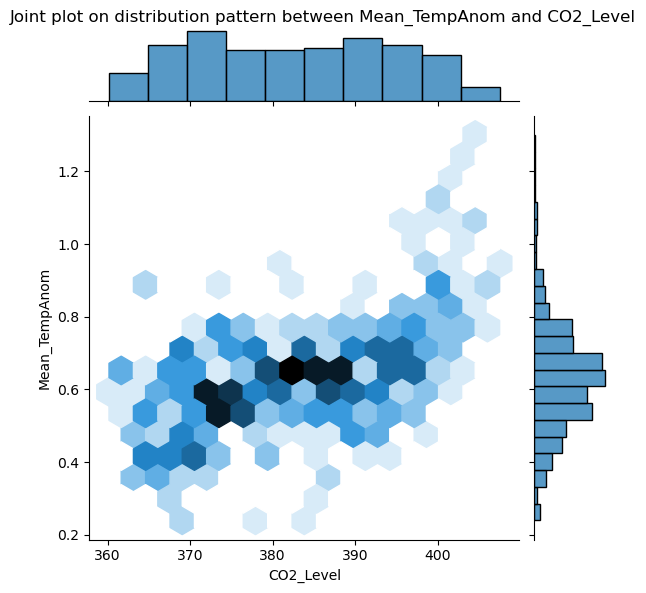

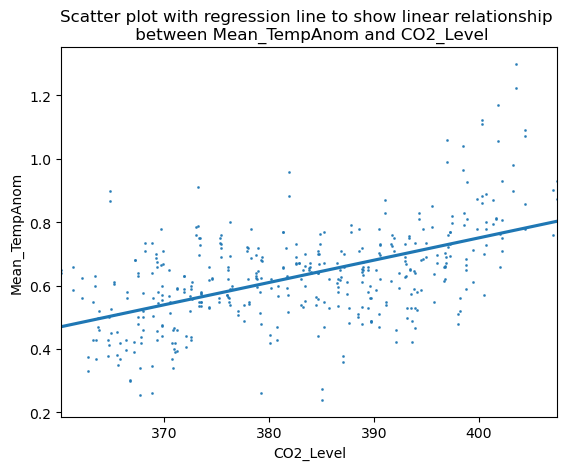

In [74]:
show_modelplots("CO2_Level","Mean_TempAnom")

[Back to Introduction](#I)<br>[Back to Table of Contents](#T)

<a id="C4_3"></a>
#### iii. Building the Model, and Visualizing it
Now that we get the picture on how the model should be looked like when plotted, we can confidently build the model and test it as well as visualize it to show the accuracy of our model.

Codes are modified from the scikit-learn documentation <b>Linear Regression Example</b>: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [93]:
# define function to conduct the regression model
def linear_regr(X_name,mod_X_train,mod_X_test,Y_name,mod_Y_train,mod_Y_test):
    # defining the independent data X and dependent data Y for linear regression
    X_train = mod_X_train.to_frame().to_numpy()
    X_test = mod_X_test.to_frame().to_numpy()
    
    Y_train = mod_Y_train.to_frame().to_numpy()
    Y_test = mod_Y_test.to_frame().to_numpy()
    
    # create logistic regression object for ease of function calling
    regr = LM.LinearRegression()
    
    # train the logistic regression model using the train set
    regr.fit(X_train,Y_train)
    
    # make predictions using the test set
    Y_pred = regr.predict(X_test)
    
    # plot the scatter diagram and linear regression line
    plt.scatter(X_test, Y_test, color="black", s=1)
    plt.plot(X_test, Y_pred, color="darkblue")
    plt.title(f"Plot on linear regression model for {X_name} towards {Y_name}")
    plt.xticks()
    plt.xlabel(X_name)
    plt.yticks()
    plt.ylabel(Y_name)
    plt.show()
    
    # obtaining the p-value for the linear regression model
    p_T = T_test(Y_test,Y_pred)[1]
    p_F = F_test(Y_test,Y_pred)[1]
    out_p_T = bool(p_T <= 0.05)
    out_p_F = bool(p_F <= 0.05)
        
    # show summary on the linear regression analysis
    print("-------SUMMARY ON LINEAR REGRESSION MODEL-------")
    print(f"Independent Variable, X: {X_name}")
    print(f"Dependent Variable, Y: {Y_name}")
    print("Coefficient: ", regr.coef_)
    print("Root mean squared error, RMSE = %.3f"% math.sqrt(MSE(Y_test,Y_pred)))
    print("R square, R\N{SUPERSCRIPT TWO} = %.3f"% R2(Y_test,Y_pred))
    print("\nT-test summary:\np-value = %.3f"% p_T)
    print(f"p-value <= 0.05 : {out_p_T}")
    print("\nF-test summary:\np-value = %.3f"% p_F)
    print(f"p-value <= 0.05 : {out_p_F}")
    
    # showing outcomes from the p-value of the t-test
    # assuming p <= 0.05, reject H0 and proves both Y_pred and Y_test have small error values
    # thus for p > 0.05, accept H0 where Y_pred and Y_test have large error values
    if (out_p_T == True) | (out_p_F == True):
        print("\nAll clear. This linear regression model is reliable.")
    else:
        print("\nERROR! This linear regression model is REJECTED!")
    print("---------------------------------------------------")

In [94]:
# define function to vi
def regr_model(X_variable,Y_variable):
    separate_data(X_variable,Y_variable)
    linear_regr(X_variable,model_X_train,model_X_test,Y_variable,model_Y_train,model_Y_test)

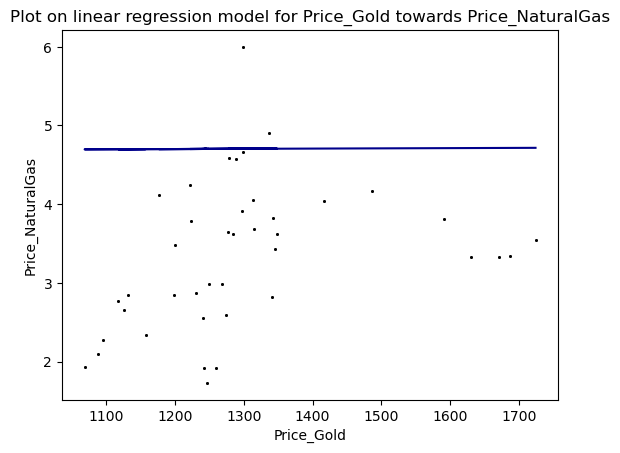

-------SUMMARY ON LINEAR REGRESSION MODEL-------
Independent Variable, X: Price_Gold
Dependent Variable, Y: Price_NaturalGas
Coefficient:  [[2.95880463e-05]]
Root mean squared error, RMSE = 1.604
R square, R² = -1.991

T-test summary:
p-value = 0.000
p-value <= 0.05 : True

F-test summary:
p-value = 0.000
p-value <= 0.05 : True

All clear. This linear regression model is reliable.
---------------------------------------------------


In [95]:
regr_model("Price_Gold","Price_NaturalGas")

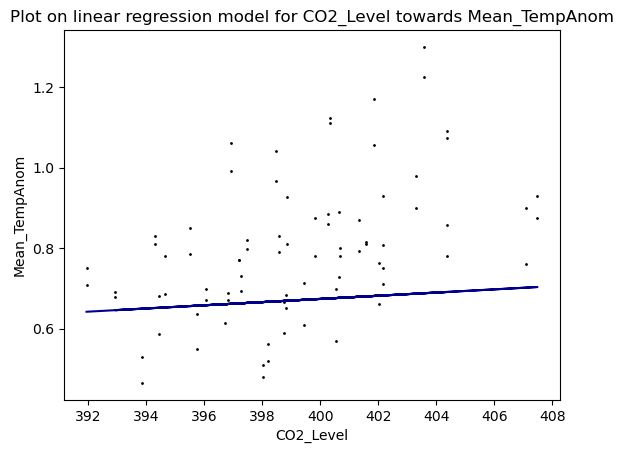

-------SUMMARY ON LINEAR REGRESSION MODEL-------
Independent Variable, X: CO2_Level
Dependent Variable, Y: Mean_TempAnom
Coefficient:  [[0.00395103]]
Root mean squared error, RMSE = 0.202
R square, R² = -0.410

T-test summary:
p-value = 0.000
p-value <= 0.05 : True

F-test summary:
p-value = 0.000
p-value <= 0.05 : True

All clear. This linear regression model is reliable.
---------------------------------------------------


In [96]:
regr_model("CO2_Level","Mean_TempAnom")